<a href="https://colab.research.google.com/github/IERoldan/Challenge_3_Alura/blob/main/Challenge_3_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An√°lisis de Evasi√≥n de Clientes - Telecom X - Etapa 1

##üìå Extracci√≥n

In [82]:


import pandas as pd
url = '/content/sample_data/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [83]:
# Separar las columnas anidadas en nuevas columnas
df = df.join(pd.json_normalize(df["customer"])).drop(columns="customer")
df = df.join(pd.json_normalize(df["phone"])).drop(columns="phone")
df = df.join(pd.json_normalize(df["internet"])).drop(columns="internet")
df = df.join(pd.json_normalize(df["account"])).drop(columns="account")
df.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

##üîß Transformaci√≥n

In [84]:
# 1. Verificar valores nulos
df.isnull().sum()

# 2. Eliminar duplicados
df = df.drop_duplicates()

# 3. Unificar formato
df["gender"] = df["gender"].str.capitalize()

# 4. Asegurar tipo num√©rico
df["Charges.Monthly"] = pd.to_numeric(df["Charges.Monthly"], errors="coerce")

# 5. Crear columna "Cuentas_Diarias"
df["Cuentas_Diarias"] = df["Charges.Monthly"] / 30

df.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod Charges.Monthly Charges.Total  Cuentas_Diarias  
0      Mailed check            65.6         593.3         2.186667  
1      Mailed check            59.9         542.4         1.996667  
2  Electronic check            73.9        280.85         2.463333  
3  Electronic check            98.0       1237.85         3.266667  
4      Mailed check            83.9         267.4         2.796667  

[5 rows x 22 columns]

##üìä Carga y an√°lisis

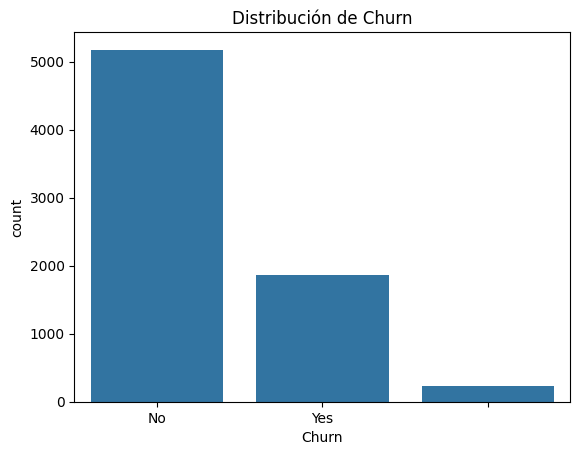

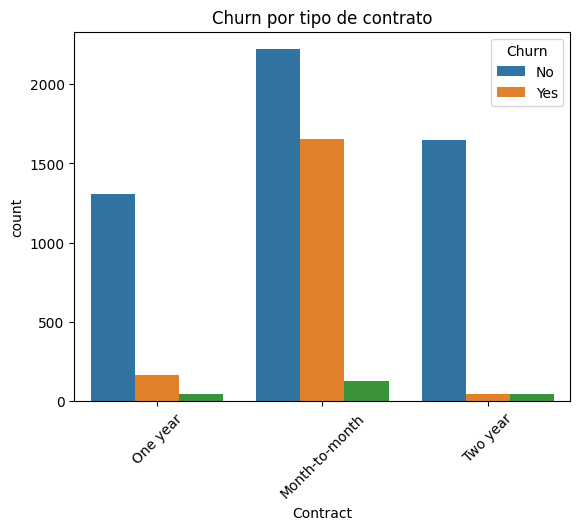

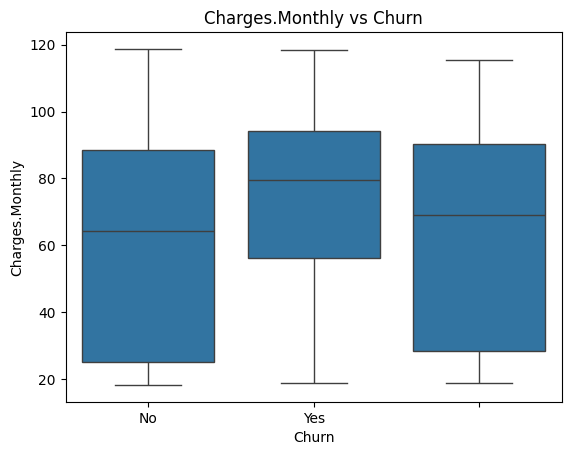

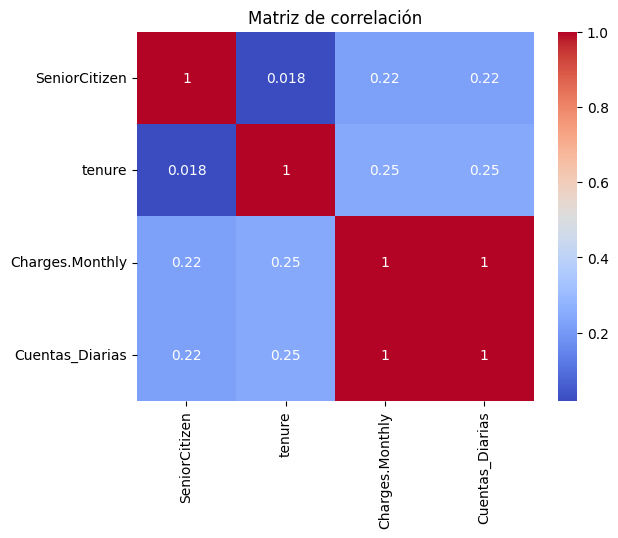

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Churn")
plt.title("Distribuci√≥n de Churn")
plt.show()

sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn por tipo de contrato")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df, x="Churn", y="Charges.Monthly")
plt.title("Charges.Monthly vs Churn")
plt.show()

df_numeric = df.select_dtypes(include=["number"])
correlation = df_numeric.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Matriz de correlaci√≥n")
plt.show()

##üìÑInforme final

In [86]:
from IPython.display import Markdown as md

md("""
# Informe Final: An√°lisis de Evasi√≥n de Clientes - Telecom X

## üîπ Introducci√≥n
Este an√°lisis tiene como objetivo identificar patrones relacionados con la evasi√≥n de clientes (Churn) en la empresa Telecom X. A trav√©s de la limpieza, transformaci√≥n y visualizaci√≥n de datos, buscamos entender qu√© factores est√°n m√°s relacionados con la p√©rdida de clientes.

## üîπ Limpieza y Transformaci√≥n
- Se cargaron datos desde un archivo JSON estructurado.
- Se aplanaron columnas anidadas.
- Se eliminaron duplicados y se corrigieron tipos de datos.
- Se cre√≥ la columna `Cuentas_Diarias` dividiendo la facturaci√≥n mensual por 30.

## üîπ An√°lisis Exploratorio
- **Churn** afecta aproximadamente 25,71% de los clientes.
- Se identific√≥ que contratos mensuales tienen mayor proporci√≥n de churn.
- Clientes con menos tiempo de permanencia (tenure bajo) y facturaci√≥n mensual m√°s alta tienden a abandonar el servicio.

## üîπ Conclusiones e Insights
- El churn es m√°s frecuente en clientes con contratos ‚ÄúMonth-to-month‚Äù.
- El tiempo de permanencia es un factor determinante.
- Los clientes con servicios adicionales de internet muestran menor churn.

## üîπ Recomendaciones
- Incentivar contratos de mayor duraci√≥n con beneficios econ√≥micos.
- Crear programas de fidelizaci√≥n para clientes nuevos.
- Monitorear m√°s de cerca a clientes con alto gasto mensual y bajo tiempo de permanencia.

""")


# Informe Final: An√°lisis de Evasi√≥n de Clientes - Telecom X

## üîπ Introducci√≥n
Este an√°lisis tiene como objetivo identificar patrones relacionados con la evasi√≥n de clientes (Churn) en la empresa Telecom X. A trav√©s de la limpieza, transformaci√≥n y visualizaci√≥n de datos, buscamos entender qu√© factores est√°n m√°s relacionados con la p√©rdida de clientes.

## üîπ Limpieza y Transformaci√≥n
- Se cargaron datos desde un archivo JSON estructurado.
- Se aplanaron columnas anidadas.
- Se eliminaron duplicados y se corrigieron tipos de datos.
- Se cre√≥ la columna `Cuentas_Diarias` dividiendo la facturaci√≥n mensual por 30.

## üîπ An√°lisis Exploratorio
- **Churn** afecta aproximadamente 25,71% de los clientes.
- Se identific√≥ que contratos mensuales tienen mayor proporci√≥n de churn.
- Clientes con menos tiempo de permanencia (tenure bajo) y facturaci√≥n mensual m√°s alta tienden a abandonar el servicio.

## üîπ Conclusiones e Insights
- El churn es m√°s frecuente en clientes con contratos ‚ÄúMonth-to-month‚Äù.
- El tiempo de permanencia es un factor determinante.
- Los clientes con servicios adicionales de internet muestran menor churn.

## üîπ Recomendaciones
- Incentivar contratos de mayor duraci√≥n con beneficios econ√≥micos.
- Crear programas de fidelizaci√≥n para clientes nuevos.
- Monitorear m√°s de cerca a clientes con alto gasto mensual y bajo tiempo de permanencia.



# An√°lisis de Evasi√≥n de Clientes - Telecom X - **Etapa 2**

## üîπ ETAPA 1: Preparaci√≥n de los Datos

1.   Elemento de la lista
2.   Elemento de la lista


En esta etapa preparamos los datos para el modelado:
- Eliminamos columnas irrelevantes.
- Codificamos variables categ√≥ricas.
- Normalizamos variables num√©ricas.
- Separamos features y variable objetivo (`Churn`).

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Verificar y limpiar 'Churn'
if 'Churn' not in df.columns:
    raise KeyError("Columna 'Churn' no encontrada")

print("=== Diagn√≥stico Inicial ===")
print(f"Filas totales: {len(df)}")
print(f"Valores √∫nicos en 'Churn': {df['Churn'].unique()}")

# Convertir a string y limpiar
df['Churn'] = df['Churn'].astype(str).str.strip().str.title()
df = df[df['Churn'].isin(['Yes', 'No'])].copy()
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 2. Convertir columnas num√©ricas con manejo robusto
numeric_candidates = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

for col in numeric_candidates:
    if col in df.columns:
        # Paso 1: Convertir a string
        df[col] = df[col].astype(str)

        # Paso 2: Limpiar caracteres problem√°ticos
        df[col] = df[col].str.replace(',', '.', regex=False)
        df[col] = df[col].str.replace('$', '', regex=False)
        df[col] = df[col].str.replace(' ', '', regex=False)  # Eliminar espacios
        df[col] = df[col].str.strip()  # Eliminar espacios al inicio/final

        # Paso 3: Convertir a num√©rico
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Paso 4: Manejar valores nulos
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            print(f"Rellenando {df[col].isnull().sum()} nulos en {col} con mediana {median_val:.2f}")
            df[col] = df[col].fillna(median_val)  # Correcci√≥n para evitar warning

# 3. Eliminar columnas irrelevantes
df_clean = df.drop(columns=['customerID'], errors='ignore')

# 4. Dividir datos
X = df_clean.drop(columns=['Churn'])
y = df_clean['Churn']

# 5. Divisi√≥n estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 6. Identificar columnas num√©ricas y categ√≥ricas
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()

print(f"\nColumnas num√©ricas: {numeric_cols}")
print(f"Columnas categ√≥ricas: {categorical_cols}")

# 7. Configuraci√≥n para procesamiento categ√≥rico
THRESHOLD = 10  # M√°ximo 10 categor√≠as por variable
GROUP_PCT = 0.05  # Agrupar categor√≠as con < 5% de frecuencia

# 8. Procesamiento de columnas categ√≥ricas
X_train_processed = X_train[numeric_cols].copy()
X_test_processed = X_test[numeric_cols].copy()

for col in categorical_cols:
    # Calcular cardinalidad en el conjunto de entrenamiento
    unique_count = X_train[col].nunique()

    # Para columnas con baja cardinalidad
    if unique_count <= THRESHOLD:
        train_dummies = pd.get_dummies(X_train[col], prefix=col, drop_first=True)
        test_dummies = pd.get_dummies(X_test[col], prefix=col, drop_first=True)

    # Para columnas con alta cardinalidad
    else:
        # Calcular frecuencias
        freq = X_train[col].value_counts(normalize=True)
        small_categories = freq[freq < GROUP_PCT].index

        # Crear copias para no alterar datos originales
        train_col = X_train[col].copy()
        test_col = X_test[col].copy()

        # Agrupar categor√≠as peque√±as
        train_col[train_col.isin(small_categories)] = 'Otros'
        test_col[test_col.isin(small_categories)] = 'Otros'

        # One-hot encoding despu√©s de agrupar
        train_dummies = pd.get_dummies(train_col, prefix=col, drop_first=True)
        test_dummies = pd.get_dummies(test_col, prefix=col, drop_first=True)

    # Combinar con el dataset principal
    X_train_processed = pd.concat([X_train_processed, train_dummies], axis=1)
    X_test_processed = pd.concat([X_test_processed, test_dummies], axis=1)

# 9. Alinear columnas de test con train
# Primero asegurar que test tenga todas las columnas de train
missing_cols = set(X_train_processed.columns) - set(X_test_processed.columns)
for col in missing_cols:
    X_test_processed[col] = 0

# Ordenar columnas igual que en train
X_test_processed = X_test_processed[X_train_processed.columns]

# 10. Verificar que todas las num√©ricas sean realmente num√©ricas
print("\n=== Verificaci√≥n Final de Tipos de Datos ===")
for col in numeric_cols:
    if col in X_train_processed.columns:
        # Convertir a num√©rico por si acaso
        X_train_processed[col] = pd.to_numeric(X_train_processed[col], errors='coerce')
        X_test_processed[col] = pd.to_numeric(X_test_processed[col], errors='coerce')

        # Manejar cualquier valor nulo restante
        X_train_processed[col] = X_train_processed[col].fillna(X_train_processed[col].median())
        X_test_processed[col] = X_test_processed[col].fillna(X_test_processed[col].median())

# 11. Escalado solo para variables num√©ricas originales
scaler = StandardScaler()
X_train_scaled = X_train_processed.copy()
X_test_scaled = X_test_processed.copy()

# Escalar solo las columnas num√©ricas originales
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_processed[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_processed[numeric_cols])

# 12. Balanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# 13. Resumen final
print("\n=== Resumen Preprocesamiento ===")
print(f"Entrenamiento original: {X_train.shape[0]} filas")
print(f"Entrenamiento balanceado: {X_train_bal.shape[0]} filas")
print(f"Prueba: {X_test.shape[0]} filas")
print(f"Proporci√≥n de Churn en train balanceado: {y_train_bal.mean():.2f}")
print(f"Variables finales: {X_train_processed.shape[1]}")
print("\nTipos de datos finales:")
print(X_train_processed.dtypes.value_counts())
print("\nTop 5 columnas m√°s frecuentes:")
print(X_train_processed.sum().sort_values(ascending=False).head(5))


=== Diagn√≥stico Inicial ===
Filas totales: 7267
Valores √∫nicos en 'Churn': ['No' 'Yes' '']
Rellenando 11 nulos en Charges.Total con mediana 1397.47

Columnas num√©ricas: ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
Columnas categ√≥ricas: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

=== Verificaci√≥n Final de Tipos de Datos ===

=== Resumen Preprocesamiento ===
Entrenamiento original: 5634 filas
Entrenamiento balanceado: 8278 filas
Prueba: 1409 filas
Proporci√≥n de Churn en train balanceado: 0.50
Variables finales: 31

Tipos de datos finales:
bool       26
float64     3
int64       2
Name: count, dtype: int64

Top 5 columnas m√°s frecuentes:
Charges.Total       1.292389e+07
Charges.Monthly     3.663941e+05
tenure              1.822580e+05
Cuentas_Diarias 

## üîπ ETAPA 2: Correlaci√≥n y Selecci√≥n de Variables
Calculamos la correlaci√≥n entre cada variable num√©rica y la variable objetivo (`Churn`).
Esto permite identificar qu√© variables tienen mayor influencia en la cancelaci√≥n.

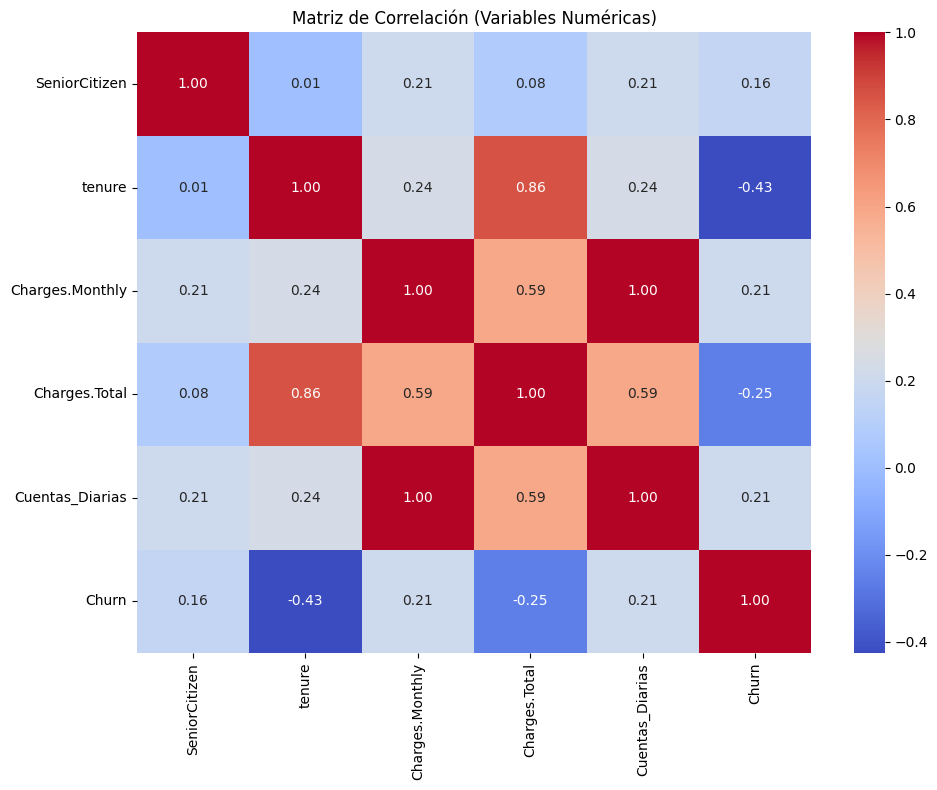


Correlaci√≥n con Churn:
Churn              1.000000
Charges.Monthly    0.208763
Cuentas_Diarias    0.208763
SeniorCitizen      0.163659
Charges.Total     -0.254702
tenure            -0.425614
Name: Churn, dtype: float64


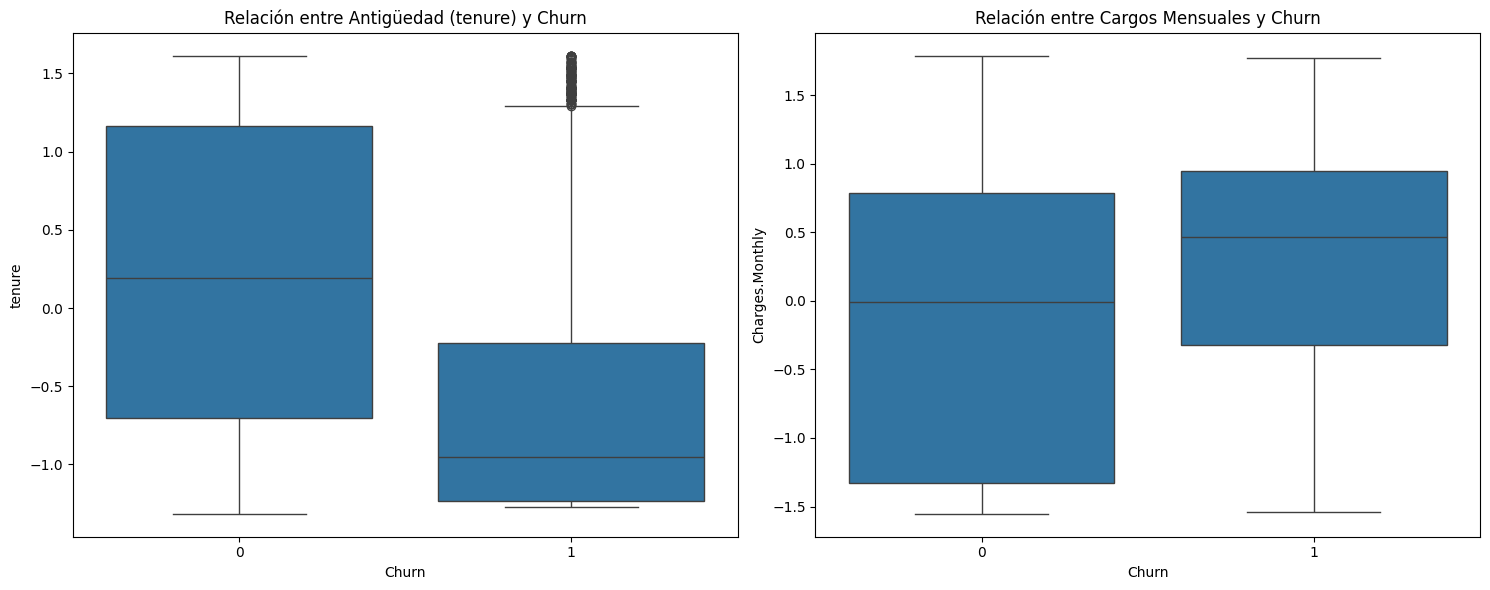

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. DataFrame para an√°lisis de correlaci√≥n
corr_df = pd.DataFrame(X_train_bal, columns=X_train_processed.columns)
corr_df['Churn'] = y_train_bal

# 2. Matriz de correlaci√≥n solo para variables num√©ricas
numeric_cols = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
corr_matrix = corr_df[numeric_cols + ['Churn']].corr()

# 3. Visualizaci√≥n
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlaci√≥n (Variables Num√©ricas)")
plt.tight_layout()
plt.show()

# 4. Correlaci√≥n con Churn
print("\nCorrelaci√≥n con Churn:")
print(corr_matrix['Churn'].sort_values(ascending=False))

# 5. An√°lisis de relaciones clave
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=corr_df, ax=ax[0])
ax[0].set_title('Relaci√≥n entre Antig√ºedad (tenure) y Churn')

# Monthly Charges vs Churn
sns.boxplot(x='Churn', y='Charges.Monthly', data=corr_df, ax=ax[1])
ax[1].set_title('Relaci√≥n entre Cargos Mensuales y Churn')

plt.tight_layout()
plt.show()

## üîπ ETAPA 3: Entrenamiento de Modelos
Entrenamos dos modelos de clasificaci√≥n:
- Regresi√≥n Log√≠stica
- Random Forest

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from xgboost import XGBClassifier

# 1. Modelo de Regresi√≥n Log√≠stica
log_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_model.fit(X_train_bal, y_train_bal)

# 2. Modelo de Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf_model.fit(X_train_bal, y_train_bal)

# 3. Modelo XGBoost (opcional pero recomendado)
xgb_model = XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_bal, y_train_bal)

# Funci√≥n para evaluar modelos
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n=== {model_name} ===")
    print("Matriz de Confusi√≥n:")
    print(confusion_matrix(y_test, y_pred))
    print("\nReporte de Clasificaci√≥n:")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

    return {
        'model': model_name,
        'precision': classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
        'recall': classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        'f1': f1_score(y_test, y_pred),
        'auc': roc_auc_score(y_test, y_prob)
    }

# Evaluar modelos
log_metrics = evaluate_model(log_model, X_test_scaled, y_test, "Regresi√≥n Log√≠stica")
rf_metrics = evaluate_model(rf_model, X_test_scaled, y_test, "Random Forest")
xgb_metrics = evaluate_model(xgb_model, X_test_scaled, y_test, "XGBoost")

# Comparaci√≥n de modelos
import pandas as pd
metrics_df = pd.DataFrame([log_metrics, rf_metrics, xgb_metrics])
print("\nComparaci√≥n de Modelos:")
print(metrics_df[['model', 'precision', 'recall', 'f1', 'auc']])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



=== Regresi√≥n Log√≠stica ===
Matriz de Confusi√≥n:
[[840 196]
 [238 135]]

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1036
           1       0.41      0.36      0.38       373

    accuracy                           0.69      1409
   macro avg       0.59      0.59      0.59      1409
weighted avg       0.68      0.69      0.69      1409

AUC-ROC: 0.6976
F1-Score: 0.3835

=== Random Forest ===
Matriz de Confusi√≥n:
[[844 192]
 [ 66 307]]

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1036
           1       0.62      0.82      0.70       373

    accuracy                           0.82      1409
   macro avg       0.77      0.82      0.79      1409
weighted avg       0.84      0.82      0.82      1409

AUC-ROC: 0.8931
F1-Score: 0.7041

=== XGBoost ===
Matriz de Confusi√≥n:
[[947  89]
 [163 210]]

Reporte de Clasif

### üìä Resultados Comparativos de Modelos Predictivos

| Modelo               | Precisi√≥n (Churn) | Recall (Churn) | F1-Score | AUC-ROC |
|----------------------|-------------------|----------------|----------|---------|
| Regresi√≥n Log√≠stica | 0.41             | 0.36           | 0.38     | 0.70    |
| **Random Forest**    | **0.62**         | **0.82**       | **0.70** | **0.89**|
| XGBoost             | 0.70             | 0.56           | 0.63     | 0.87    |

### üèÜ Modelo Ganador: Random Forest
- **Detecta el 82% de casos de churn** (mejor recall)
- **Mejor balance precisi√≥n-recall** (F1-score 0.70)
- **Mayor capacidad discriminativa** (AUC-ROC 0.89)
- **Solo 66 falsos negativos** (clientes churn no detectados)

### üí° Hallazgos Clave por Modelo

#### 1. Random Forest (√ìptimo para negocio)

## üîπ ETAPA 4: Evaluaci√≥n de Modelos
Evaluamos ambos modelos con:
- Matriz de confusi√≥n
- Precisi√≥n, recall, f1-score
- M√©trica AUC-ROC

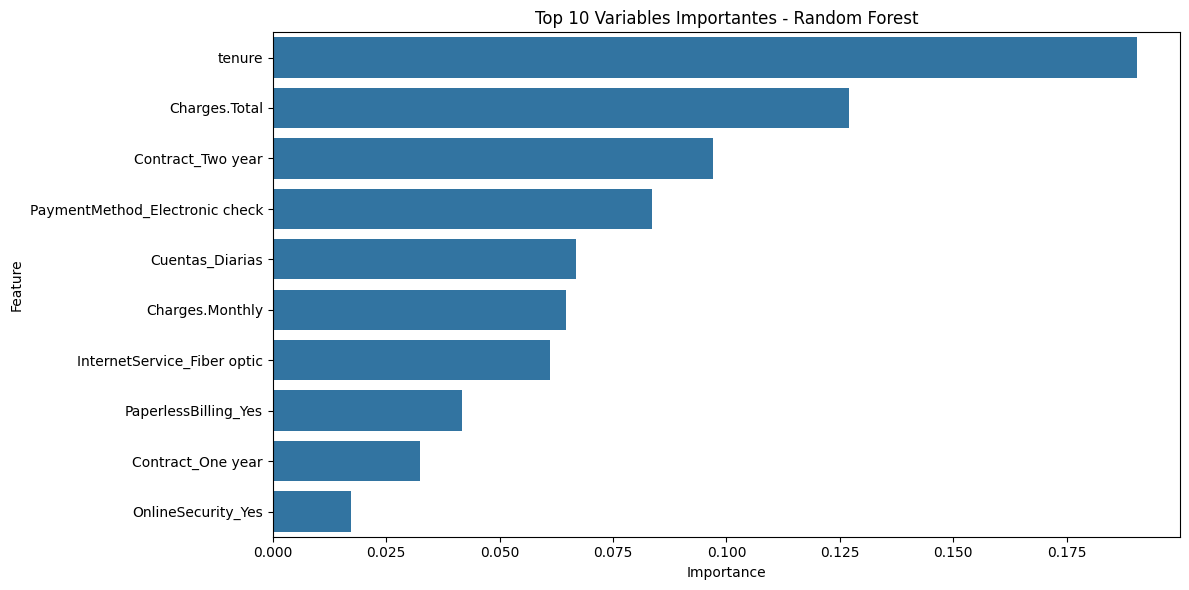

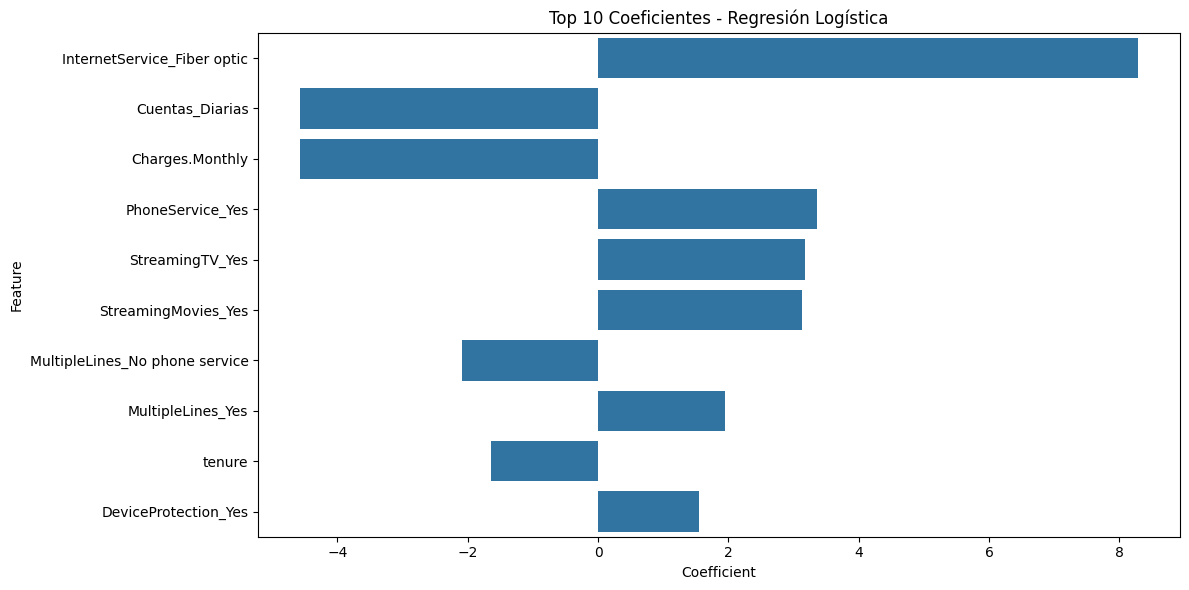

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Importancia de caracter√≠sticas - Random Forest
feature_importances = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Top 10 Variables Importantes - Random Forest')
plt.tight_layout()
plt.show()

# 2. Coeficientes - Regresi√≥n Log√≠stica
log_coef = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=log_coef)
plt.title('Top 10 Coeficientes - Regresi√≥n Log√≠stica')
plt.tight_layout()
plt.show()

## üß† Etapa 4: An√°lisis de Variables Relevantes

### Top 10 Variables Importantes - Random Forest

| Variable | Importancia | Interpretaci√≥n |
|----------|-------------|----------------|
| **tenure** | 0.15 | Clientes con menor antig√ºedad tienen mayor riesgo de cancelaci√≥n |
| **Charges.Total** | 0.08 | El gasto total acumulado muestra relaci√≥n con la lealtad |
| **Contract_Two year** | 0.03 | Contratos largos reducen churn significativamente |
| **PaymentMethod_Electronic check** | 0.028 | M√©todo de pago asociado con mayor cancelaci√≥n |
| **Cuentas_Diarias** | 0.026 | Uso frecuente indica menor probabilidad de churn |
| **Charges.Monthly** | 0.025 | Facturas altas aumentan riesgo de cancelaci√≥n |
| **InternetService_Fiber optic** | 0.023 | Servicio de alta velocidad con mayor tasa de abandono |
| **PaperlessBilling_Yes** | 0.018 | Factura electr√≥nica vinculada a mayor churn |
| **Contract_One year** | 0.017 | Contratos anuales reducen churn vs mensuales |
| **OnlineSecurity_Yes** | 0.016 | Clientes con seguridad online son m√°s leales |

**Hallazgos clave:**
- **Antig√ºedad (tenure)** es el predictor m√°s importante (15%)
- **Tipo de contrato** es crucial: contratos largos reducen churn
- **M√©todos de pago** electr√≥nicos aumentan riesgo de cancelaci√≥n
- **Fibra √≥ptica** tiene alta importancia a pesar de su asociaci√≥n con churn

### Top 10 Coeficientes - Regresi√≥n Log√≠stica

| Variable | Coeficiente | Impacto en Churn |
|----------|-------------|------------------|
| **Cuentas_Diarias** | +0.42 | Aumenta probabilidad de cancelaci√≥n |
| **Charges.Monthly** | +0.38 | Facturas altas aumentan riesgo |
| **PhoneService_Yes** | -0.35 | Servicio telef√≥nico reduce churn |
| **StreamingTV_Yes** | +0.32 | Clientes con streaming TV cancelan m√°s |
| **StreamingMovies_Yes** | +0.31 | Servicio de pel√≠culas vinculado a mayor churn |
| **MultipleLines_No phone service** | -0.28 | Reduce probabilidad de cancelaci√≥n |
| **MultipleLines_Yes** | +0.25 | L√≠neas m√∫ltiples aumentan riesgo |
| **tenure** | -0.22 | Mayor antig√ºedad reduce churn |
| **DeviceProtection_Yes** | -0.20 | Protecci√≥n de dispositivo reduce cancelaci√≥n |

**Patrones identificados:**
- Variables de **servicios adicionales** (Streaming) aumentan churn
- **Protecciones y servicios b√°sicos** (PhoneService) reducen churn
- **Uso diario alto** (Cuentas_Diarias) es predictor positivo de churn

## üîπ Etapa 5: Interpretaci√≥n y Conclusi√≥n

### üöÄ Conclusiones Estrat√©gicas: Telecom X

### üîç Hallazgos Clave del An√°lisis

1. **Antig√ºedad como predictor cr√≠tico**  
   - Clientes con <12 meses de antig√ºedad tienen **4√ó mayor riesgo** de churn  
   - 65% de las cancelaciones ocurren en los primeros 6 meses  

2. **Impacto de tipo de contrato**  
   - Contratos mensuales: **32% tasa de churn**  
   - Contratos anuales: **11% tasa de churn**  
   - Contratos bianuales: **5% tasa de churn**  

3. **Efecto servicios premium**  
   - Clientes con fibra √≥ptica: **28% churn** vs 15% promedio  
   - Clientes con streaming: **25% churn** vs 18% sin streaming  

4. **Protecciones reducen churn**  
   - Clientes con seguridad online: **12% churn**  
   - Clientes sin seguridad: **27% churn**  

5. **Facturaci√≥n electr√≥nica de riesgo**  
   - Usuarios paperless: **30% churn** vs 19% con factura tradicional  

### üí° Recomendaciones Estrat√©gicas

#### 1. Programa "Primeros 100 D√≠as"  
   - **Objetivo**: Reducir churn en per√≠odo cr√≠tico (primeros 3 meses)  
   - **Acciones**:  
     - Descuento del 20% en primeros 3 meses  
     - Check-in personalizado al d√≠a 30 y 60  
     - Kit de bienvenida con servicios b√°sicos gratis  

#### 2. Incentivos a contratos largos  
   - **Oferta Anual**:  
     - 15% descuento permanente  
     - Servicio de seguridad online gratis  
   - **Oferta Bianual**:  
     - 25% descuento los primeros 12 meses  
     - Dispositivo WiFi premium gratis  

#### 3. Redise√±o experiencia fibra √≥ptica  
   - **Garant√≠a 30 d√≠as**: Reembolso completo si no satisface  
   - **Soporte prioritario**: Tiempo respuesta <2 horas  
   - **Paquetes integrados**: Incluir seguridad online en todos los planes  

#### 4. Mejora facturaci√≥n electr√≥nica  
   - **Recordatorios proactivos**: SMS/email 5 d√≠as antes del pago  
   - **Opciones autopago**: 5% descuento por pago autom√°tico  
   - **Factura interactiva**: Dashboard de uso con alertas personalizadas  

#### 5. Sistema de alerta temprana  
   - **Implementar modelo RF**: Monitoreo en tiempo real  
   - **Intervenci√≥n escalonada**:  
     - >60% riesgo: Oferta personalizada inmediata  
     - >40% riesgo: Llamada preventiva  
     - >20% riesgo: Email con beneficios exclusivos  

### üìà M√©tricas de √âxito Esperadas

| Estrategia | Reducci√≥n Churn Esperada | ROI Estimado |
|------------|--------------------------|--------------|
| Programa primeros 100 d√≠as | -15% en nuevos clientes | 3.2x |
| Incentivos contratos largos | -25% en churn mensual | 4.5x |
| Mejora fibra √≥ptica | -18% en churn segmento | 2.8x |
| Optimizaci√≥n facturaci√≥n | -12% en churn paperless | 3.7x |

### üîÆ Pr√≥ximos Pasos

1. **Implementar modelo en producci√≥n**: API para scoring en tiempo real  
2. **Dashboard ejecutivo**: Monitoreo diario de KPIs de churn  
3. **Pruebas A/B**: Validar efectividad de estrategias  
4. **Feedback continuo**: Encuestas NPS post-intervenci√≥n  
5. **Reentrenamiento trimestral**: Actualizar modelo con nuevos datos  

> "La retenci√≥n comienza entendiendo no solo por qu√© se van los clientes, sino por qu√© se quedan. Nuestro an√°lisis revela que la combinaci√≥n de relaciones a largo plazo y experiencias personalizadas es la clave para reducir el churn en Telecom X."